# MIDTERM EXAM 
## Question 2

**Analysis (Collection, Storage and Retrieval)** : It is the data collection, storage and retrieval from the Archive API in NYT Developers Networks. 
I have collected the data of Year 2015 for and organized the folder according to the newsdesk, 
section, sub-section and then storing the abstract and url of the articles in the text file of that corresponding folder. ( Focused on Collection and Storage of data( only headlines and URL to a .txt file)

In [3]:
import requests #import requests library
import json,os,re,datetime
nyt_book_search_key=os.getenv('auth_key') # importing the key into the environment variable
path_to_folder="ArchiveData" #path to the destination folder
print(nyt_book_search_key)

637daae035c64f088e2903af56a35295


In [4]:
for year in range(2015,2016): #checking in that year range
    for month in range(1,13):  # for two months data
        books_url=('http://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(month)+'.json??&api-key='+nyt_book_search_key)# fetching the data from this url    
        get_request = requests.get(books_url) 
        read_book=json.loads(get_request.text)#loading the data fetched to an obejct

In [290]:
def ensure_dir(path_to_folder): #declaring a function 
    if not os.path.exists(path_to_folder): #if the folder doesn't exist then create the directory
        os.makedirs(path_to_folder)# make a directory

In [235]:
path=""
abs_list=[]
for i in range(1,10): #iterating over tens items only
    pub_date=read_book['response']['docs'][i]['pub_date']
    
    match=re.search(r'\d{4}-\d{2}-\d{2}',pub_date)
    datei=datetime.datetime.strptime(match.group(),'%Y-%m-%d').date()
    
    newsdesk=read_book['response']['docs'][i]['news_desk'] #get the values of news desk and all the items
    section=read_book['response']['docs'][i]['section_name']
    subsection=read_book['response']['docs'][i]['subsection_name']
    abstract=read_book['response']['docs'][i]['abstract']
    web_url=read_book['response']['docs'][i]['web_url']
    
    path=os.path.join(path_to_folder+'/'+str(datei.year))
    path=os.path.join(path+'/'+str(newsdesk))
    path=os.path.join(path+'/'+str(section))
    path=os.path.join(path+'/'+str(subsection))
    path=os.path.join(path+'/'+'abstract')
    
    ensure_dir(path)
    path=os.path.join(path,'abstract'+'.txt')
    with open(path,'w') as outfile:
        if abstract!="":
            outfile.write('Abstract of this news is:\n\n************************\n\n'+str(abstract)+'\n\n\n\nYou can find more info at:\n\n**********************************\n\n'+str(web_url))
            outfile.write("\n")
    

!['title'](img/news.png)

**Analysis I**: This analysis is based upon the criminal rates in different cities with different type of count of crimes

In [10]:
for year in range(2013,2014): #checking in that year range
    for month in range(2,8):  # for two months data
        books_url=('http://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(month)+'.json??&api-key='+nyt_book_search_key)# fetching the data from this url    
        get_request = requests.get(books_url) 
        read_book=json.loads(get_request.text)#loading the data fetched to an obejct

In [365]:
path=""
path_to_folder="Analysis1data"
abs_list=[]
for i in range(1,100): #iterating over tens items only
    pub_date=read_book['response']['docs'][i]['pub_date']
    
    match=re.search(r'\d{4}-\d{2}-\d{2}',pub_date)
    datei=datetime.datetime.strptime(match.group(),'%Y-%m-%d').date()
    
    newsdesk=read_book['response']['docs'][i]['news_desk'] #iterating over all the sections
    section=read_book['response']['docs'][i]['section_name']
    subsection=read_book['response']['docs'][i]['subsection_name']
    abstract=read_book['response']['docs'][i]['abstract']
    web_url=read_book['response']['docs'][i]['web_url']
    
    path=os.path.join(path_to_folder+'/'+str(datei.year))
    path=os.path.join(path+'/'+str(newsdesk))
    path=os.path.join(path+'/'+str(section))
    path=os.path.join(path+'/'+str(subsection))
    path=os.path.join(path+'/'+'abstract')
    
    ensure_dir(path)
    path=os.path.join(path,'file'+'.json')
    with open(path,'w') as jsonfile:
        json.dump(read_book['response']['docs'][i],jsonfile)
            

In [12]:
cali=0
texas=0
for root, dirs, files in os.walk(path_to_folder):
    for f in files:
        if f.endswith('.json'):
            with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as json_file:   
                if 'pub_date' in politics.keys():
                    match= re.search(r'\d{4}-\d{2}-\d{2}', politics['pub_date'])
                    date = datetime.datetime.strptime(match.group(), '%Y-%m-%d').date()
                    for i in range(0,len(politics['keywords'])):
                        if 'glocation' in politics['keywords'][i]['name']:
                            if politics['keywords'][i]['value']=='Texas':
                                lead=politics['lead_paragraph'].lower()
                                if 'murder' in lead: #check if murder happened in Texas
                                    texas+=1
                                if 'kill'in lead:
                                    texas+=1
                                if 'bomb' in lead:
                                    texas+=1
                                if 'killed' in lead:
                                    texas+=1
                                if 'protest' in lead:
                                    texas+=1
                            if  politics['keywords'][i]['value']=='California':
                                
                                lead=politics['lead_paragraph'].lower()
                                
                                if 'protest' in lead:
                                    cali+=1
                                if 'killed' in lead:
                                    cali+=1
                                if 'bomb' in lead:
                                    cali+=1
                                if 'murder' in lead:
                                    cali+=1
                                    

print( 'Number of Shootings,crime and murder in Texas is',+texas)
print( 'Number of Shootings,crime and murder in california is',+cali)

Number of Shootings,crime and murder in Texas is 0
Number of Shootings,crime and murder in california is 0


**Analysis II** : 
This analysis is based on the **Books API: Best Sellers** wherein I have analysed the number of early releases that the books that got newly published within 2 years

In [489]:
import json,csv
path_to_folder="Analysis2data"


In [490]:
url=('http://api.nytimes.com//svc/books/v3/lists/names.json??&api-key='+nyt_book_search_key)
get_request = requests.get(url) 
read_Text=json.loads(get_request.text)
#read_Text

In [501]:
pathbooks=""
abso_list=[]
books_list={}
name_books=[]
for i in range(1,50): #iterating over thousands items only
    new_pub_date=read_Text['results'][i]['newest_published_date']
    old_pub_date=read_Text['results'][i]['oldest_published_date']
    
    match_new_date=re.search(r'\d{4}-\d{2}-\d{2}',new_pub_date)
    match_old_date=re.search(r'\d{4}-\d{2}-\d{2}',old_pub_date)
    datenew=datetime.datetime.strptime(match_new_date.group(),'%Y-%m-%d').date()
    dateold=datetime.datetime.strptime(match_old_date.group(),'%Y-%m-%d').date()
    
    yeardiff=datenew.year-dateold.year
    
    
    updated=read_Text['results'][i]['updated']
    displayname=read_Text['results'][i]['display_name']
    listnameenc=read_Text['results'][i]['list_name_encoded']
    listname=read_Text['results'][i]['list_name']
    
    pathbooks=os.path.join(path_to_folder+'/'+str(datenew.year))  # joining the path together
    pathbooks=os.path.join(pathbooks+'/'+str(datenew.month))
    pathbooks=os.path.join(pathbooks+'/'+str(updated))
    pathbooks=os.path.join(pathbooks+'/'+str(listnameenc))
    pathbooks=os.path.join(pathbooks+'/'+str(displayname))
    
    
    ensure_dir(pathbooks)
    pathbooks=os.path.join(pathbooks,'file'+'.json')
    with open(pathbooks,'w') as outfile:
        json.dump(listname,outfile) 
        
        
    with open('Books_published.csv', 'w') as csvfile:   #open the csvfile
        fieldnames = ['Books','New Published Year','Old Published Year']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)  #write the csv file using writer
        writer.writeheader()
        if yeardiff == 2:
            if yeardiff not in books_list:
                books_list[yeardiff]=1
                #name_books.append(displayname)
            else:
                books_list[yeardiff]+=1
                #name_books.append(displayname)
            print(displayname,datenew.year,dateold.year)
            writer.writerow({'Books':displayname,'New Published Year':datenew.year,'Old Published Year':dateold.year}) #writer to write the row


Children’s Middle Grade E-Book 2017 2015
Children’s Middle Grade Hardcover 2017 2015
Children’s Middle Grade Paperback 2017 2015
Young Adult E-Book 2017 2015
Young Adult Hardcover 2017 2015
Young Adult Paperback 2017 2015
Combined Hardcover & Paperback Fiction 2013 2011
Combined Hardcover & Paperback Nonfiction 2013 2011
Hardcover Business Books 2013 2011
Indigenous Americans 2016 2014
Paperback Business Books 2013 2011


!['Books Published within two year''](img/books_published.png)

**Analysis III**: This anlysis is related to Donald Trump's Presidential political promotional times

In [465]:
import json,csv
path_to_folder="Analysis3data"    

In [499]:
books_url=('http://api.nytimes.com/svc/search/v2/articlesearch.json?q=trump&facet_field=source&api-key='+nyt_book_search_key)# fetching the data from this url    
get_request = requests.get(books_url) 
read_book=json.loads(get_request.text)#loading the data fetched to an obejct


In [468]:
path=""
abs_list=[]
for i in range(1,10): #iterating over thousands items only
    pub_date=read_book['response']['docs'][i]['pub_date']
    
    match=re.search(r'\d{4}-\d{2}-\d{2}',pub_date)
    datei=datetime.datetime.strptime(match.group(),'%Y-%m-%d').date()
    try:
        doctype=read_book['response']['docs'][i]['document_type']
        section=read_book['response']['docs'][i]['section_name']
        subsection=read_book['response']['docs'][i]['subsection_name']
        leadpara=read_book['response']['docs'][i]['lead_paragraph']

    
        path=os.path.join(path_to_folder+'/'+str(datei.year))
        path=os.path.join(path+'/'+str(datei.strftime('%b')))  
        path=os.path.join(path+'/'+str(datei.day))
        path=os.path.join(path+'/'+str(doctype))
        path=os.path.join(path+'/'+str(section))
        path=os.path.join(path+'/'+str(subsection))
        path=os.path.join(path+'/'+'leadpara')

        ensure_dir(path)
        path=os.path.join(path,'file'+'.json')
        with open(path,'w') as jsonfile:
            json.dump(read_book['response']['docs'][i],jsonfile)
            
    except (TypeError,AttributeError):
        pass
    

In [479]:
trump=dict.fromkeys(range(1,4),0)
military=dict.fromkeys(range(1,4),0)
republicans=dict.fromkeys(range(1,4),0)
protestors=dict.fromkeys(range(1,4),0)
immigration=dict.fromkeys(range(1,4),0)
terrorism=dict.fromkeys(range(1,4),0)
for root, dirs, files in os.walk(path_to_folder):
    for f in files:
        if f.endswith('.json'):        
            with open(os.path.join(root,f), 'r', encoding='utf-8', errors="ignore") as file:
                trumpdata=json.load(file)    
                match=re.search(r'\d{4}-\d{2}-\d{2}', trumpdata['pub_date'])
                date=datetime.datetime.strptime(match.group(),'%Y-%m-%d').date() #checking the trump related words in the context
                if( "trump" or 'Donald' or 'president-elect') in  (trumpdata['lead_paragraph'].lower() or trumpdata['headline']['main'].lower()):
                    if("trump" or "president's" or 'president') in (trumpdata['lead_paragraph'].lower() or trumpdata['headline']['main'].lower()):
                        trump[date.month]+=1
                    if ('organization') in (trumpdata['lead_paragraph'].lower() or trumpdata['headline']['main'].lower()):
                        military[date.month]+=1
                    if ('trump' or 'republicans' or 'democrats') in  (trumpdata['lead_paragraph'].lower() or trumpdata['headline']['main'].lower()):
                        republicans[date.month]+=1
                    if ('trump' or 'protestors') in  (trumpdata['lead_paragraph'].lower() or trumpdata['headline']['main'].lower()):
                        protestors[date.month]+=1
                    if ('trump' or 'immigration' or "refugee") in (trumpdata['lead_paragraph'].lower() or trumpdata['headline']['main'].lower()):
                        immigration[date.month]+=1
                    if ('trump'or 'terrorism' or 'taliban' or 'government') in  (trumpdata['lead_paragraph'].lower() or trumpdata['headline']['main'].lower()):
                        terrorism[date.month]+=1  
                        
               

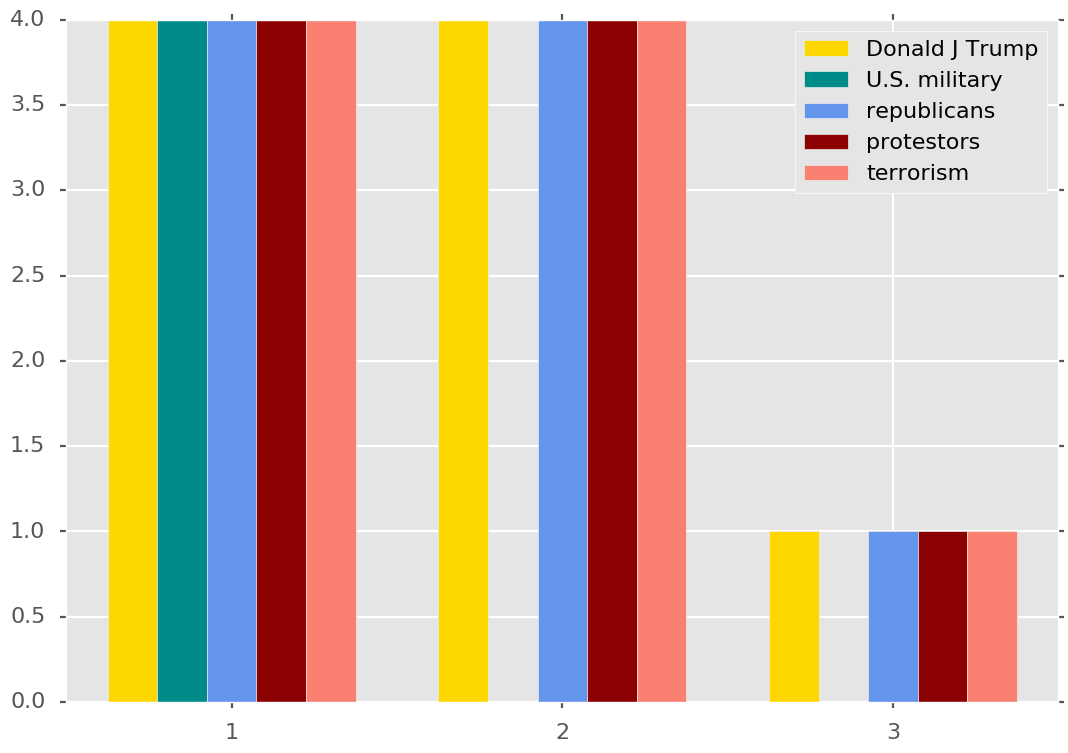

In [507]:
import matplotlib.pyplot as plt #plotting the graph

plt.style.use('ggplot')
plt.style.use('seaborn-dark-palette')
plt.style.use('seaborn-poster')

pos=[0.15]*5
z = plt.subplot(111)

t=[i - (j*2) for i, j in zip(trumpx, pos)]
m=[i - (j) for i, j in zip(trumpx, pos)]
p=[i + (j) for i, j in zip(protestorsx, pos)]
t=[i + (j*2) for i, j in zip(terrorismx, pos)]
trumpx=[]
trumpy=[]
for a in trump:
    trumpx.append(a)
    trumpy.append(trump[a])

militaryx=[]
militaryy=[]
for a in military:
    militaryx.append(a)
    militaryy.append(military[a])
republicansx=[]
republicansy=[]
for a in republicans:
    republicansx.append(a)
    republicansy.append(republicans[a])
protestorsx=[]
protestorsy=[]
for a in protestors:
    protestorsx.append(a)
    protestorsy.append(protestors[a])
terrorismx=[]
terrorismy=[]
for a in terrorism:
    terrorismx.append(a)
    terrorismy.append(terrorism[a])

z.bar(o, trumpy,width=0.15,color='gold',align='center',label='Donald J Trump')

z.bar(m, militaryy,width=0.15,color='darkcyan',align='center',label='U.S. military')

z.bar(republicansx, republicansy,width=0.15,color='cornflowerblue',align='center',label='republicans')

z.bar(p, protestorsy,width=0.15,color='darkred',align='center',label='protestors')

z.bar(t, terrorismy,width=0.15,color='salmon',align='center',label='terrorism')
plt.xticks(trumpx,trumpx)
z.legend()
plt.show()



!['Graph of Trump presidential times'](img/graph_trump.png)